### Step 1: Import libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle

# roc curve and auc score
from sklearn import svm, datasets, metrics
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Step 2: Defining a python function to plot the ROC curves.

In [22]:
def plot_roc_curve(fpr, tpr, roc_auc, names):
    lw = 1
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'deeppink', 'green'])
    for i, color, name in zip(range(len(fpr)), colors, names):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve of classifier {0} (area = {1:0.2f})'
             ''.format(name, roc_auc[i]))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

### Step 3: Import brest cancer dataset

In [23]:
breast_cancer = datasets.load_breast_cancer()
data_X = breast_cancer.data
class_label = breast_cancer.target

In [24]:
data_X.shape

(569, 30)

In [25]:
np.unique(class_label, return_counts=True)

(array([0, 1]), array([212, 357]))

### Step Optional: Add noisy features to make the problem harder

In [27]:
random_state = np.random.RandomState(0)
n_samples, n_features = data_X.shape
data_X = np.c_[data_X, random_state.randn(n_samples, 200 * n_features)]

In [28]:
data_X

array([[ 1.79900000e+01,  1.03800000e+01,  1.22800000e+02, ...,
         2.78410943e-02, -7.43614718e-01, -4.79805529e-01],
       [ 2.05700000e+01,  1.77700000e+01,  1.32900000e+02, ...,
         2.61143591e-01,  1.71842567e+00, -1.45837143e+00],
       [ 1.96900000e+01,  2.12500000e+01,  1.30000000e+02, ...,
         1.20601132e+00,  3.97599282e-01,  2.00828095e+00],
       ...,
       [ 1.66000000e+01,  2.80800000e+01,  1.08300000e+02, ...,
         1.14146559e+00,  4.57825451e-01, -1.41576717e+00],
       [ 2.06000000e+01,  2.93300000e+01,  1.40100000e+02, ...,
         9.29020304e-01,  6.90132505e-01, -9.56788247e-02],
       [ 7.76000000e+00,  2.45400000e+01,  4.79200000e+01, ...,
         1.28606420e+00,  8.37872077e-01,  2.50072366e-01]])

### Step 4: Split the data into train and test sub-datasets.

In [29]:
trainX, testX, trainy, testy = train_test_split(data_X, class_label, test_size=0.3, random_state=1)

In [30]:
print(trainX.shape)
print(testX.shape)

(398, 1212030)
(171, 1212030)


### Step 5: Fit a model on the train data.

In [31]:
randomForestModel = RandomForestClassifier()
randomForestModel.fit(trainX, trainy)

logisticRegressionModel = LogisticRegression()
logisticRegressionModel.fit(trainX, trainy)

svc_w_linear_kernel = svm.SVC(kernel='linear')
svc_w_linear_kernel.fit(trainX, trainy)

svc_wo_linear_kernel = svm.SVC()
svc_wo_linear_kernel.fit(trainX, trainy)

dummy = DummyClassifier()
dummy.fit(trainX, trainy)

/home/lucas_bgabriel/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DummyClassifier()

### Step 6: Predict probabilities for the test data.

In [11]:
models = []
modelName = ["RFM", "LRM", "SVMW", "SVMWO", "DUMMY"]
models.append(randomForestModel.predict(testX))
models.append(logisticRegressionModel.predict(testX))
models.append(svc_w_linear_kernel.predict(testX))
models.append(svc_wo_linear_kernel.predict(testX))
models.append(dummy.predict(testX))

In [12]:
models

[array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
        0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1]),
 array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1

### Step 7: Accuracy

In [13]:
print("Accuracy RFM %.2f" %   metrics.accuracy_score(testy, models[0]))
print("Accuracy LRM %.2f" %   metrics.accuracy_score(testy, models[1]))
print("Accuracy SVMW %.2f" %  metrics.accuracy_score(testy, models[2]))
print("Accuracy SVMWO %.2f" % metrics.accuracy_score(testy, models[3]))
print("Accuracy DUMMY %.2f" % metrics.accuracy_score(testy, models[4]))

Accuracy RFM 0.91
Accuracy LRM 0.92
Accuracy SVMW 0.94
Accuracy SVMWO 0.91
Accuracy DUMMY 0.63


### Step 8: Precision

In [14]:
print("precision RFM %.2f" %   metrics.precision_score(testy, models[0]))
print("precision LRM %.2f" %   metrics.precision_score(testy, models[1]))
print("precision SVMW %.2f" %  metrics.precision_score(testy, models[2]))
print("precision SVMWO %.2f" % metrics.precision_score(testy, models[3]))
print("precision DUMMY %.2f" % metrics.precision_score(testy, models[4]))

precision RFM 0.90
precision LRM 0.91
precision SVMW 0.94
precision SVMWO 0.89
precision DUMMY 0.63


### Step 8: Recall

In [15]:
print("Recall RFM %.2f" %   metrics.recall_score(testy, models[0]))
print("Recall LRM %.2f" %   metrics.recall_score(testy, models[1]))
print("Recall SVMW %.2f" %  metrics.recall_score(testy, models[2]))
print("Recall SVMWO %.2f" % metrics.recall_score(testy, models[3]))
print("Recall DUMMY %.2f" % metrics.recall_score(testy, models[4]))

Recall RFM 0.97
Recall LRM 0.96
Recall SVMW 0.96
Recall SVMWO 0.98
Recall DUMMY 1.00


### Step 9: F-Score

In [16]:
print("F1-Score RFM %.2f" %   metrics.f1_score(testy, models[0]))
print("F1-Score LRM %.2f" %   metrics.f1_score(testy, models[1]))
print("F1-Score SVMW %.2f" %  metrics.f1_score(testy, models[2]))
print("F1-Score SVMWO %.2f" % metrics.f1_score(testy, models[3]))
print("F1-Score DUMMY %.2f" % metrics.f1_score(testy, models[4]))

F1-Score RFM 0.93
F1-Score LRM 0.94
F1-Score SVMW 0.95
F1-Score SVMWO 0.93
F1-Score DUMMY 0.77


### Step 10: Compute the AUC Score.

In [17]:
roc_auc = dict()
for i in range(len(models)):
    roc_auc[i] = roc_auc_score(testy, models[i])

print("AUC LRM %.2f"   % roc_auc[0])
print("AUC LRM %.2f"   % roc_auc[1])
print("AUC SVMW %.2f"  % roc_auc[2])
print("AUC SVMWO %.2f" % roc_auc[3])
print("AUC DUMMY %.2f" % roc_auc[4])

AUC LRM 0.89
AUC LRM 0.90
AUC SVMW 0.93
AUC SVMWO 0.89
AUC DUMMY 0.50


### Step 11: Get the ROC Curve.

In [18]:
fpr = dict()
tpr = dict()

for i in range(len(models)):
    fpr[i], tpr[i], _ = roc_curve(testy, models[i])

### Step 11: Plot ROC Curve using our defined function

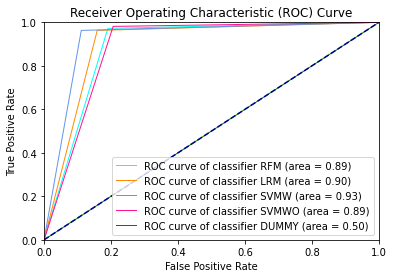

In [19]:
plot_roc_curve(fpr, tpr, roc_auc, modelName)

Como podemos observar, as ROC curves dão uma perspectiva diferente de quando medimos simplesmente a acuracia dos classificadores, com ela, tirar dúvidas quanto a classificadores que pareciam bons e que na verdade não são tão bons, ou até desempatar classificadores que pareciam ter a mesma acuracia.